In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
X_train = pd.read_csv("uci_har/train/X_train.txt", delim_whitespace = True, header=None)
X_test = pd.read_csv("uci_har/test/X_test.txt", delim_whitespace = True, header=None)
y_train = pd.read_csv("uci_har/train/y_train.txt", delim_whitespace = True, header=None, names = ["label"])
y_test = pd.read_csv("uci_har/test/y_test.txt", delim_whitespace = True, header=None, names = ["label"])

In [3]:
def label_activity(x):
    if x["label"] == 1:
        x["activity"] = "Walking"
    elif x["label"] == 2:
        x["activity"] = "Walking upstairs"
    elif x["label"] == 3:
        x["activity"] = "Walking downstairs"
    elif x["label"] == 4:
        x["activity"] = "Sitting"
    elif x["label"] == 5:
        x["activity"] = "Standing"
    else: 
        x["activity"] = "Laying"
    return x

In [4]:
y_train["activity"] = np.nan
y_train = y_train.apply(label_activity, axis = 1)

In [5]:
y_train.isnull().any()

label       False
activity    False
dtype: bool

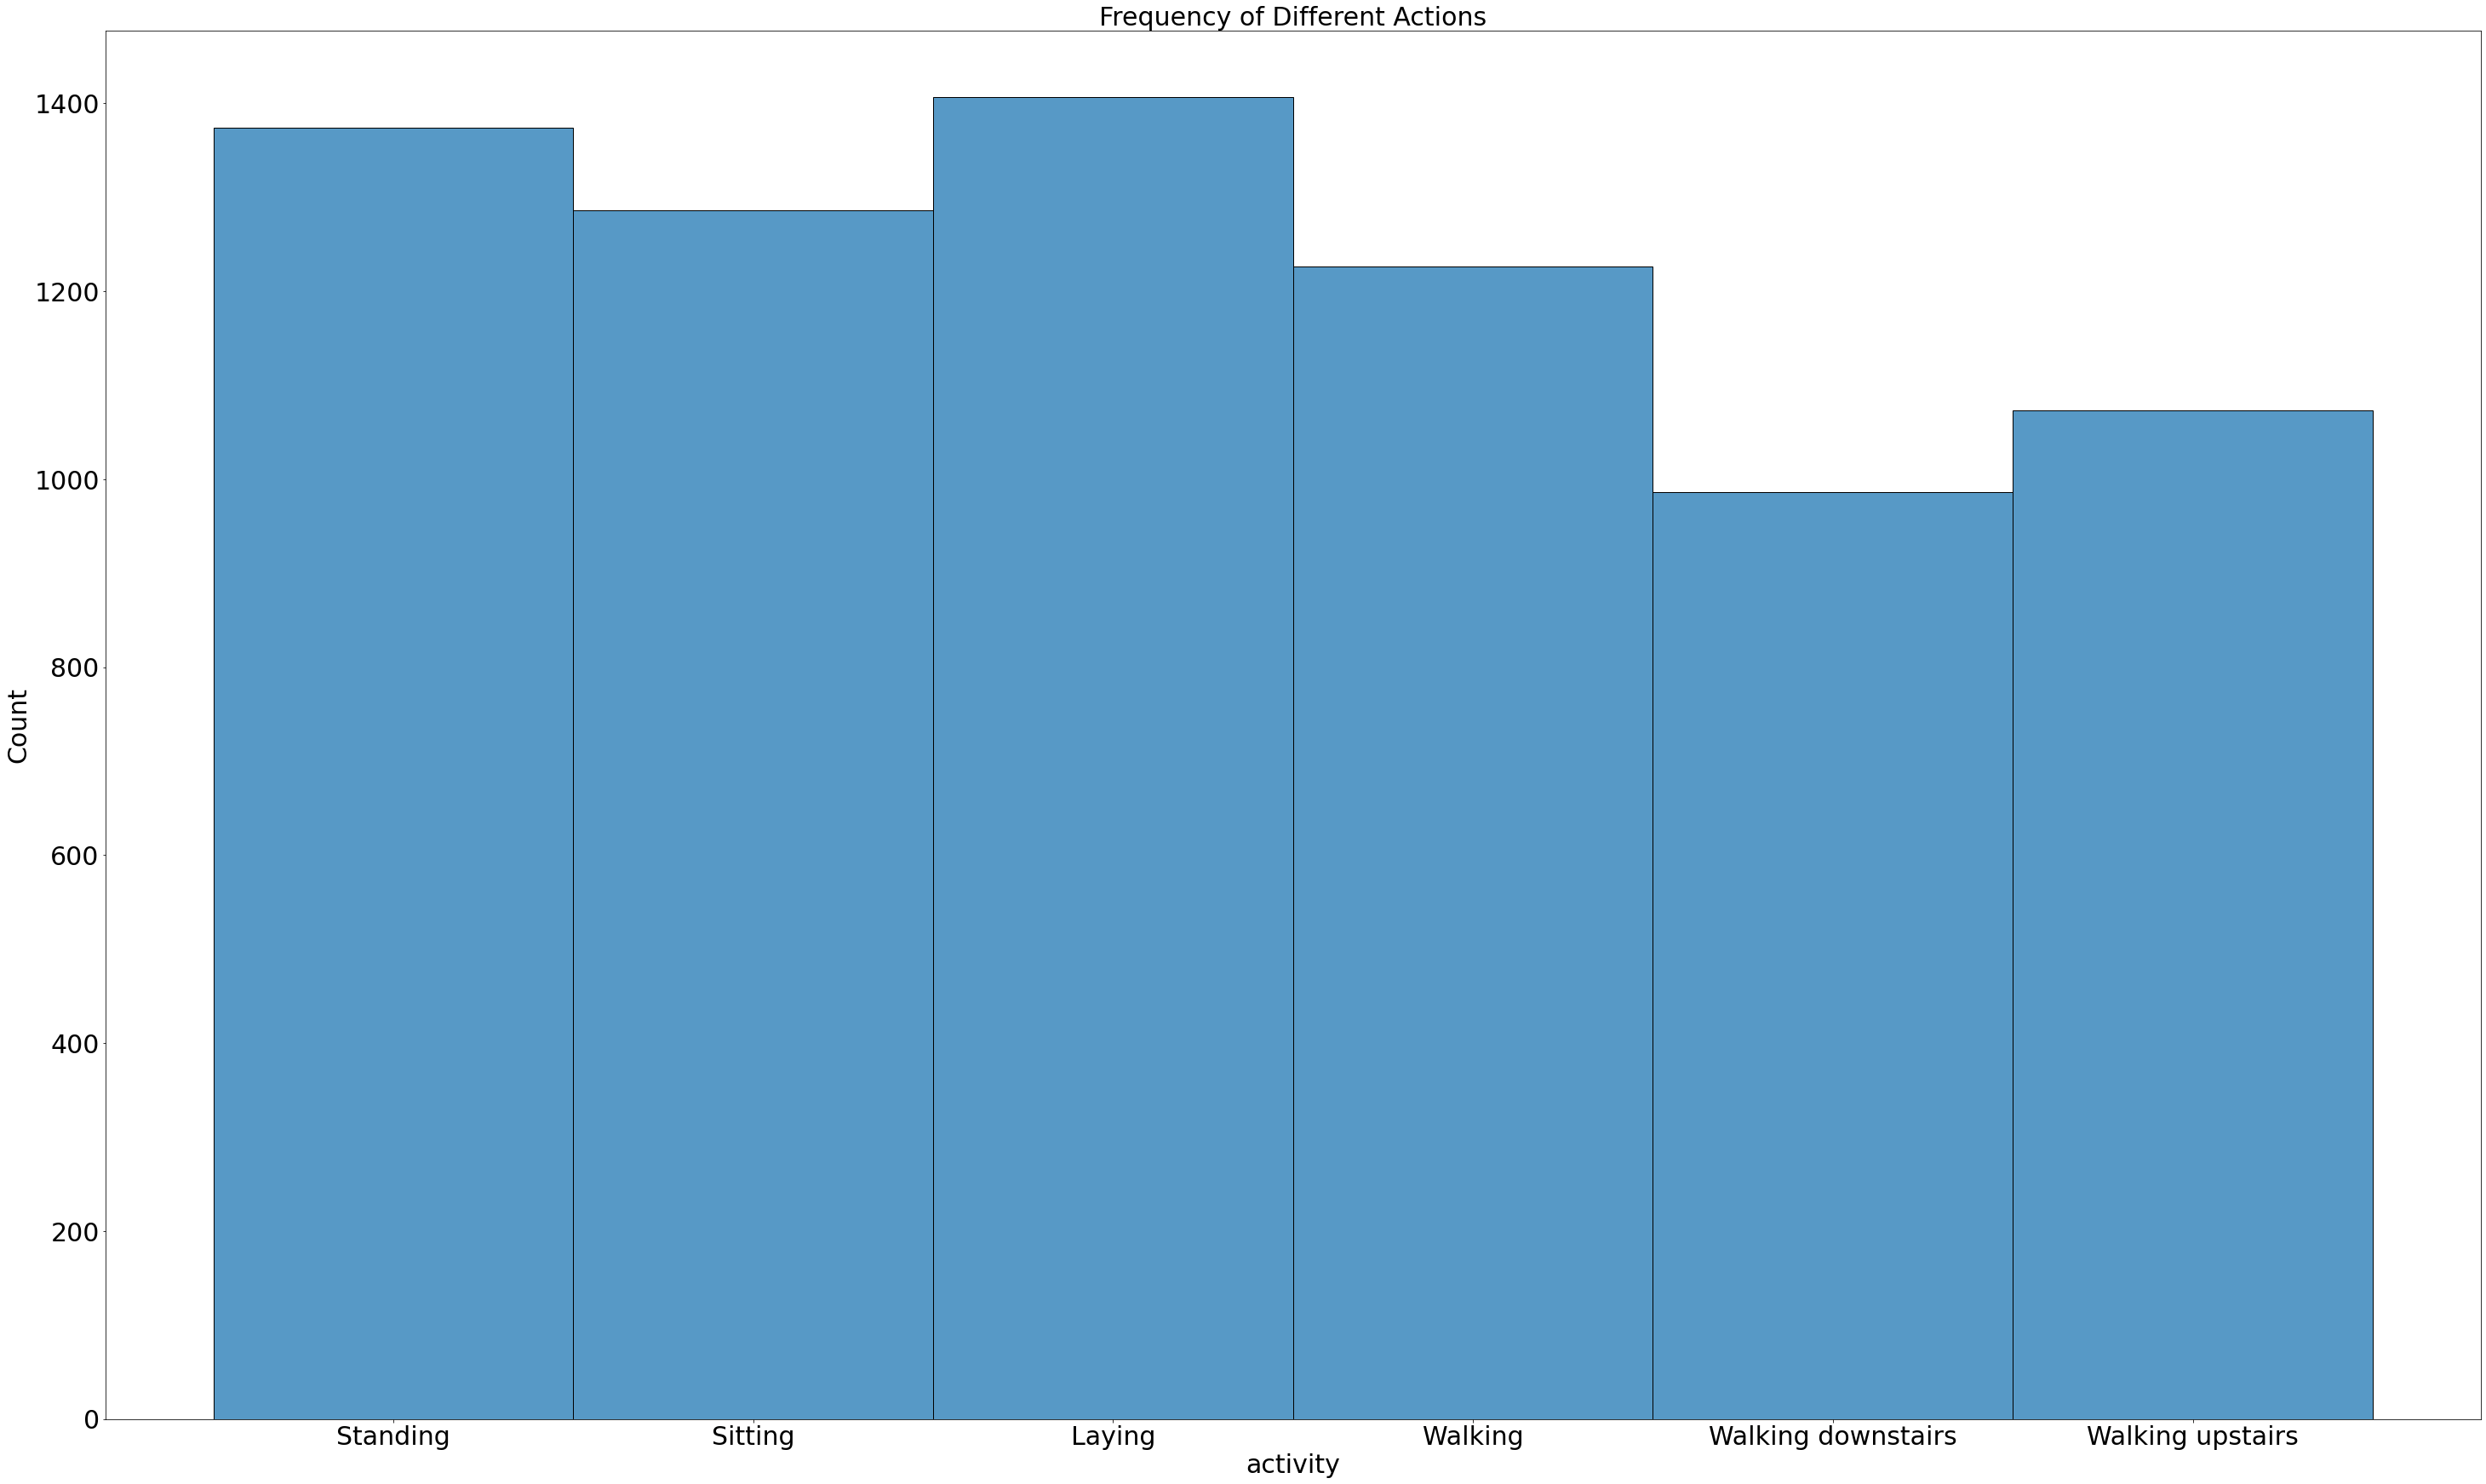

In [6]:
plt.figure(figsize = (50, 30))
plt.rcParams['font.size'] = '30'
sns.histplot(y_train["activity"])
plt.title("Frequency of Different Actions", fontsize = 30)
plt.show()

In [7]:
X = X_train
y = y_train["label"]

In [8]:
model = SVC(kernel = 'linear')

model.fit(X, y)
y_pred = model.predict(X_test)

print("Accuracy on test:", model.score(X_test, y_test))

Accuracy on test: 0.9640312181879878


In [9]:
model = LogisticRegression()

model.fit(X, y)
y_pred = model.predict(X_test)

print("Accuracy on test:", model.score(X_test, y_test))

Accuracy on test: 0.9579233118425518


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
model = RandomForestClassifier()

model.fit(X, y)
y_pred = model.predict(X_test)

print("Accuracy on test:", model.score(X_test, y_test))

Accuracy on test: 0.9287410926365796
